POLYNOMIAL REGRESSION WITH ANN IN NUMPY YO

In [2]:
# todo fix gradient problem

In [3]:
# Python imports
import numpy as np  # Matrix and vector computation package
np.seterr(all='ignore') # ignore numpy warning like multiplication of inf
import matplotlib.pyplot as plt  # Plotting library
# Allow matplotlib to plot inside this notebook
%matplotlib inline
# Set the seed of the numpy random number generator so that the tutorial is reproducable
numpy.random.seed(seed=1)

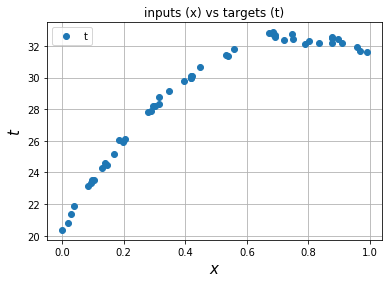

In [4]:
# Define the vector of input samples as x, with 20 values sampled from a uniform distribution
# between 0 and 1
x = numpy.random.uniform(0, 1, 50)

# Generate the target values t from x with small gaussian noise so the estimation won't
# be perfect.
# Define a function f that represents the line that generates t without noise
def f(x): return x ** 3 - 22 * x ** 2 + 32 * x + 20.5

# Create the targets t with some gaussian noise
noise_variance = 0.2  # Variance of the gaussian noise
# Gaussian noise error for each sample in x
noise = numpy.random.randn(x.shape[0]) * noise_variance
# Create targets t
t = f(x) + noise

# Plot the target t versus the input x
plt.plot(x, t, 'o', label='t')
# Plot the initial line
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$t$', fontsize=15)
plt.title('inputs (x) vs targets (t)')
plt.grid()
plt.legend(loc=2)
plt.show()

In [5]:
# Define the neural network function as polynomial of a given degree (w is a list)
def nn(x, w): return x ** 3 * w[3] + x ** 2 * w[2] + x * w[1] + w[0]

# Define the cost function
def cost(y, t): return ((t - y)**2).sum()

In [26]:

# define the gradient function.
def gradient(w, x, t): 
    return (nn(x, w) - t).T * x

# define the update function delta w (the update should be a vector)
def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t)

w = np.array([1, 0.1, 0.1, 0.1, 0.1])
    
learning_rate = 0.1


# Start performing the gradient descent updates, and print the weights and cost:
nb_of_iterations = 100  # number of gradient descent updates
w_cost = [(w, cost(nn(x, w), t))] # List to store the weight,costs values
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  # Get the delta w update
    print(w)
    print('przerwa')
    print(dw)
    w = w - dw  # Update the current weight parameter
    w_cost.append((w, cost(nn(x, w), t)))  # Add weight,cost to list

# # Print the final w, and cost
# for i in range(0, len(w_cost)):
#     print('w({}): {:.4f} \t cost: {:.4f}'.format(i, w_cost[i][0], w_cost[i][1]))
# for w in w_cost:
#     print(w[0])




[1.  0.1 0.1 0.1 0.1]
przerwa
[-1.20467172e+00 -2.24587948e+00 -2.21537148e-04 -8.20733081e-01
 -3.44655055e-01 -2.05959011e-01 -4.65888281e-01 -9.69986328e-01
 -1.13855007e+00 -1.62913219e+00 -1.21170976e+00 -2.16598083e+00
 -5.13503987e-01 -2.71802373e+00 -5.58577879e-02 -2.12167289e+00
 -1.21239113e+00 -1.71542501e+00 -3.31387718e-01 -4.93048608e-01
 -2.49087579e+00 -2.94499173e+00 -8.56060957e-01 -2.17446802e+00
 -2.73927137e+00 -2.78951351e+00 -1.88039068e-01 -8.15823991e-02
 -4.09863688e-01 -2.75128208e+00 -2.21545447e-01 -1.22213407e+00
 -2.93760724e+00 -1.61799675e+00 -2.18053011e+00 -8.73887528e-01
 -2.17705314e+00 -2.58514115e+00 -3.61873567e-02 -2.34589501e+00
 -2.99986167e+00 -2.36032129e+00 -7.51337557e-01 -2.44271179e+00
 -2.32229300e-01 -1.32580131e+00 -2.81307819e+00 -7.96758687e-01
 -7.72009514e-01 -3.02135486e-01]


ValueError: operands could not be broadcast together with shapes (5,) (50,) 